In [ ]:
# mounting the drive 
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# Note the  padded_sequence_length = 1286 gives optimal 73% accuracy. But getting this padded_sequence_length as 1286 value is random. Because from the 15k data, the lyrics are randomly split into train and test. 
# so the a certain specific combination of lyrics in train dataset gives the padded_sequence_length as 1286. 
# Other times, I usually get padded_sequence_length as 1722 instead of 1286. And 1722 is usually fed into input layer of the LSTM model. I get a slighly (69% -72%) lower accuracy for 1722. 

In [ ]:
# Importing libraries and modules
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/cleaned_15k_dataset.csv', encoding='latin-1')

In [ ]:
# printing the dataframe 
df.head(10)

,artist,lyric,title,rating
0,Hillsong,i will love you lord my strength i belong to y...,I Will Love,0
1,Vera Lynn,when the light go on again all over the world ...,When the Lights Go on Again,0
2,Georgia Mass Choir,when you be down and in despair do not be unea...,"Hold On, Help Is on the Way",0
3,Richard Wyands,let build a stairway to the star and climb tha...,Stairway to the Stars,0
4,Echo & the Bunnymen,show me something that i have not see before s...,Proxy,1
5,Tripping Daisy,she the melt pot of summer she a balloon with ...,Stella Is a Planet,0
6,Brian McKnight,nelly look just ai not the same when you slid...,All Night Long,1
7,Lenny Kravitz,i be you and you be me why that such a mystery...,Believe,0
8,Billy Bragg,on monday i wish it be tuesday night so i can ...,Wishing the Days Away [Ballad Version],0
9,Betty Elders,i have see that kind of hurt before you keep i...,Crayons,0


In [ ]:
# drop the unnecessary columns
df.drop('artist', axis=1, inplace=True)
df.head(10)

,lyric,title,rating
0,i will love you lord my strength i belong to y...,I Will Love,0
1,when the light go on again all over the world ...,When the Lights Go on Again,0
2,when you be down and in despair do not be unea...,"Hold On, Help Is on the Way",0
3,let build a stairway to the star and climb tha...,Stairway to the Stars,0
4,show me something that i have not see before s...,Proxy,1
5,she the melt pot of summer she a balloon with ...,Stella Is a Planet,0
6,nelly look just ai not the same when you slid...,All Night Long,1
7,i be you and you be me why that such a mystery...,Believe,0
8,on monday i wish it be tuesday night so i can ...,Wishing the Days Away [Ballad Version],0
9,i have see that kind of hurt before you keep i...,Crayons,0


In [ ]:
import pandas as pd
import numpy as np
import string, re
import itertools
import nltk
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS

In [ ]:
# drop the unnecessary columns
df.drop('title', axis=1, inplace=True)
df.head(10)

,lyric,rating
0,i will love you lord my strength i belong to y...,0
1,when the light go on again all over the world ...,0
2,when you be down and in despair do not be unea...,0
3,let build a stairway to the star and climb tha...,0
4,show me something that i have not see before s...,1
5,she the melt pot of summer she a balloon with ...,0
6,nelly look just ai not the same when you slid...,1
7,i be you and you be me why that such a mystery...,0
8,on monday i wish it be tuesday night so i can ...,0
9,i have see that kind of hurt before you keep i...,0


In [ ]:
# veryfying the sentiment values
# 1 is positive sentiment and 0 is negative sentiment
df['rating'].value_counts()

#0    7500
#1    7500

0    7500
1    7500
Name: rating, dtype: int64

In [ ]:
lens = df['lyric'].str.len()
print(lens.mean())
print(lens.std())
print(lens.min())
print(lens.max())

1048.197
596.8841662932017
277
8545


In [ ]:
print(df.dropna().shape)

(15000, 2)


In [ ]:
df['senLen'] = df['lyric'].apply(lambda x: len(x))
data = df.sort_values(by='senLen')
plot = go.Scatter(x = data['senLen'], y = data['rating'], mode='markers')
lyt = go.Layout(title="lyric Length vs. valence label", xaxis=dict(title='lyric Length'),yaxis=dict(title='Label'))
fig = go.Figure(data=[plot], layout=lyt)
py.iplot(fig)

In [ ]:
from wordcloud import WordCloud,STOPWORDS

In [ ]:
df.head(5)

,lyric,rating
0,i will love you lord my strength i belong to y...,0
1,when the light go on again all over the world ...,0
2,when you be down and in despair do not be unea...,0
3,let build a stairway to the star and climb tha...,0
4,show me something that i have not see before s...,1


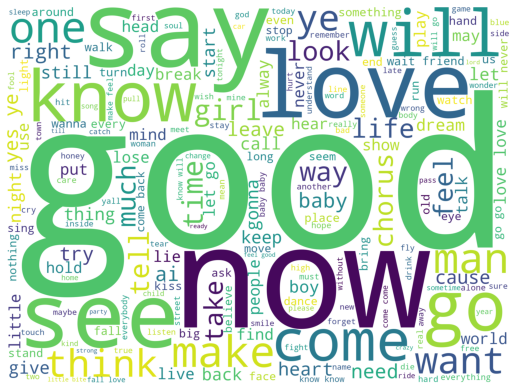

In [ ]:
df_pos = df[ df['rating'] == 1]
df_pos = df_pos['lyric']

wordcloud1 = WordCloud(stopwords=STOPWORDS,
                          background_color='white',
                          width=2000,
                          height=1500
                          ).generate(" ".join(df_pos))
plt.figure(1,figsize=(9, 9))
plt.imshow(wordcloud1)
plt.axis('off')
plt.show()

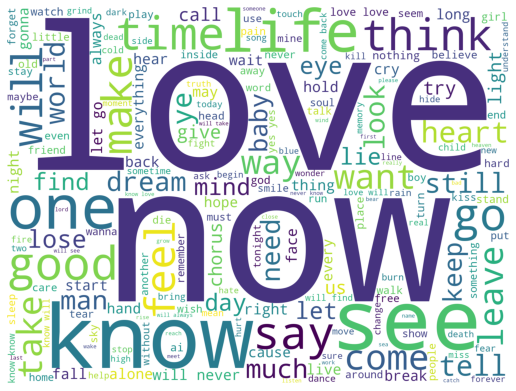

In [ ]:
df_neg = df[ df['rating'] == 0]
df_neg = df_neg['lyric']

wordcloud1 = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=2000,
                      height=1500
                      ).generate(" ".join(df_neg))
plt.figure(1,figsize=(9, 9))
plt.imshow(wordcloud1)
plt.axis('off')
plt.show()

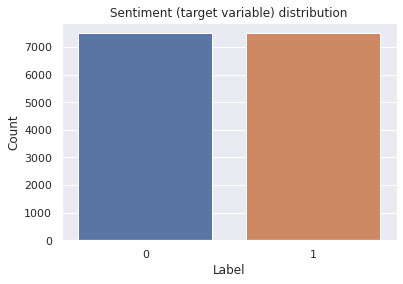

In [ ]:
sns.set(style="darkgrid")
b = sns.countplot(x='rating',
                  data = df.drop(['lyric'], axis=1))
b.axes.set_title('Sentiment (target variable) distribution')
b.set_xlabel("Label")
b.set_ylabel("Count")
plt.show()

In [ ]:
df.lyric = df.lyric.astype(str)

In [ ]:
# splitting the data into training and testing data

from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df['lyric'].values, df['rating'].values, test_size=0.20)  # 80-20 training andtest split

# split the lyric text into x_train and x_test and rating (valence) into y_train and y_test.

In [ ]:
# Check the x_train data after split

print('Lyrics: ', x_train[0])

sentiment Text:  people be look but they do not know what to do it the time of the season for the people like you come back tomorrow show the scar on your face it a clue to the answer we all chase three five and seven lift the heavy load reach the top of the heaven that fall below devil may care but you wish for the good ca not you see there a answer that lie there come all you sinner and keep with the time can we see all the face that have fall behind do not make the reason it a secret for you there a clue to the answer we all know there no clue to the answer we all know people be look but they do not know what to do it the time of the season for the people like you come back tomorrow show the scar on your face it a clue to the answer we all chase it a clue to the answer we all chase


In [ ]:
# Check the y_train data after split

print('Valence: ', y_train[0])

Valence:  0


In [ ]:
# Check the x_test data  after split

print('Lyrics: ', x_test[0])

Lyrics:  some people can get a thrill knit sweater and set still that okay for some people who do not know they be alive some people can thrive and bloom live life in the live room that perfect for some people of one hundred and five but i at less  try when i think of all the sight that i  see and all the place i  play all the thing that i  be at come on papa what do you say some people can be content play bingo and pay rend that peachy for some people for some humdrum people to be but some people ai not me i have a dream a wonderful dream papa all about june in the orpheum circuit gimme a chance and i know i can work it i have a dream just as real as can be papa there i be in mr orpheum office and he be say to me rise get yourself some new orchestration new routine and red velvet curtain get a feather hat for the baby photograph in front of the theatre get a agent and in jig time you will be be book in the big time  what a dream a wonderful dream papa and all that i need be eightyeigh

In [ ]:
# Check the y_test data  after split

print('Valence: ', y_test[0])

Valence:  0


In [ ]:
# converting the strings into integers using Tokenizer 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# instantiating the tokenizer
MAX_VOCAB = 90000000 # is basically max features. How many unique words to use i.e., num or rows in embedding vector)
tokenizer = Tokenizer(num_words= MAX_VOCAB)
tokenizer.fit_on_texts(x_train) # fit on input x_train data

In [ ]:
# Checking the word index for the length of vocab we have 
WordIndex = tokenizer.word_index

# Calculate the vocabulary size of the dataset
Vocab_size = len(WordIndex)
print('The size of datatset vocab is: ', Vocab_size) 

The size of datatset vocab is:  30057


I love a cat = ["I", "love", "a", "cat"] = [1, 2, 3, 4]

I have a cat = ["I", have", "a", "cat"] = [1, 5, 3, 4]

I have a cat and dog =  ["I", have", "a", "cat", "and", "dog"] = [1, 5, 3, 4, "6","7"]



In [ ]:
# Convert Train data and Test data text into sequences
train_seq = tokenizer.texts_to_sequences(x_train)
test_seq = tokenizer.texts_to_sequences(x_test)
print('Training sequence: ', train_seq[0])
print('Testing sequence: ', test_seq[0])

Training sequence:  [163, 4, 75, 29, 49, 13, 9, 26, 33, 5, 13, 8, 3, 46, 15, 3, 853, 25, 3, 163, 32, 2, 37, 71, 395, 168, 3, 1148, 17, 16, 156, 8, 7, 1774, 5, 3, 497, 22, 24, 717, 410, 543, 6, 826, 615, 3, 782, 877, 409, 3, 413, 15, 3, 277, 14, 112, 944, 619, 137, 188, 29, 2, 229, 25, 3, 38, 315, 9, 2, 43, 45, 7, 497, 14, 135, 45, 37, 24, 2, 1587, 6, 89, 31, 3, 46, 19, 22, 43, 24, 3, 156, 14, 21, 112, 300, 13, 9, 44, 3, 381, 8, 7, 505, 25, 2, 45, 7, 1774, 5, 3, 497, 22, 24, 26, 45, 36, 1774, 5, 3, 497, 22, 24, 26, 163, 4, 75, 29, 49, 13, 9, 26, 33, 5, 13, 8, 3, 46, 15, 3, 853, 25, 3, 163, 32, 2, 37, 71, 395, 168, 3, 1148, 17, 16, 156, 8, 7, 1774, 5, 3, 497, 22, 24, 717, 8, 7, 1774, 5, 3, 497, 22, 24, 717]
Testing sequence:  [108, 163, 19, 20, 7, 595, 10496, 3372, 6, 333, 111, 14, 546, 25, 108, 163, 91, 13, 9, 26, 49, 4, 423, 108, 163, 19, 3507, 6, 1729, 107, 73, 12, 3, 107, 356, 14, 556, 25, 108, 163, 15, 50, 655, 6, 543, 29, 1, 64, 868, 94, 35, 1, 66, 15, 24, 3, 532, 14, 1, 43, 6, 24,

I love a cat = ["I", "love", "a", "cat"] = [1, 2, 3, 4] =  [1, 2, 3, 4, 0, 0]

I have a cat = ["I", have", "a", "cat"] = [1, 5, 3, 4] = [1, 5, 3, 4, 0, 0]

I have a cat and dog =  ["I", have", "a", "cat", "and", "dog"] = [1, 5, 3, 4, "6","7"] = 

Notice that the train and test sequences are of unequal length so, now apply padding so that the train and test sequences are of equal length.

In [ ]:
# Padding the training sequences to get equal length sequence to use sequences of equal length
pad_train = pad_sequences(train_seq)
padded_seq_len = pad_train.shape[1]
print('The length of training sequence is: ', padded_seq_len)  # Note the 1286 gives optimal 73% accuracy. Because getting this 1286 is random. Beccause of the 15k data, the lyrics are randomly split into train and test. 
# so the a certain specific combination of lyrics in train dataset gives the padded_sequence_length as 1286. 
# Other times, I usually get padded_sequence_length as 1722 in stead of 1286. And 1722 is usually fed into input layer of the LSTM model.

The length of training sequence is:  1286


In [ ]:
# Padding the test sequences to get equal length sequence to use sequences of equal length
pad_test = pad_sequences(test_seq, maxlen=padded_seq_len)
print('The length of testing sequence is: ', pad_test.shape[1])

The length of testing sequence is:  1286


Run till above code cell and then execute the load model to predict the unknown lyrics, so that you can run the saved model from google drive.

In [ ]:
# Model using Keras API

from tensorflow.keras.layers import Input, Dense, Embedding, LSTM, GlobalMaxPooling1D
from tensorflow.keras.models import Model # intiate the model 

# Layers used in this model are : Input, Dense, Embedding, LSTM, GlobalMaxPooling1D

# https://keras.io/api/layers/  --> Kera layers documentation


# Important LSTM parameters from documentation.

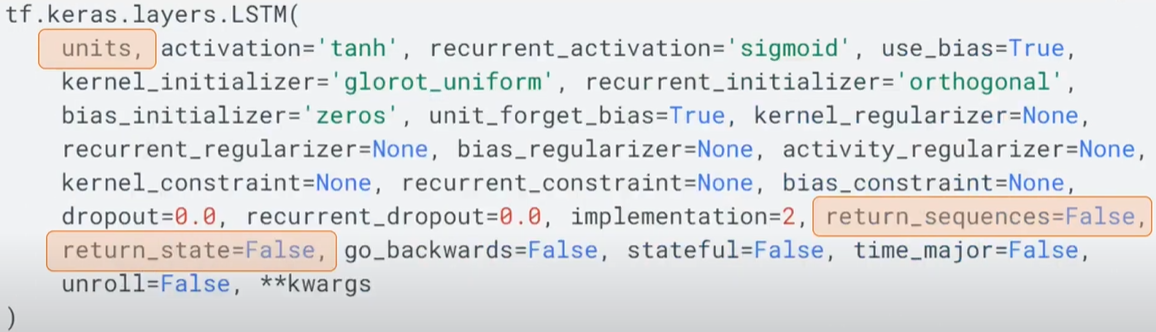

# Arguments in detail

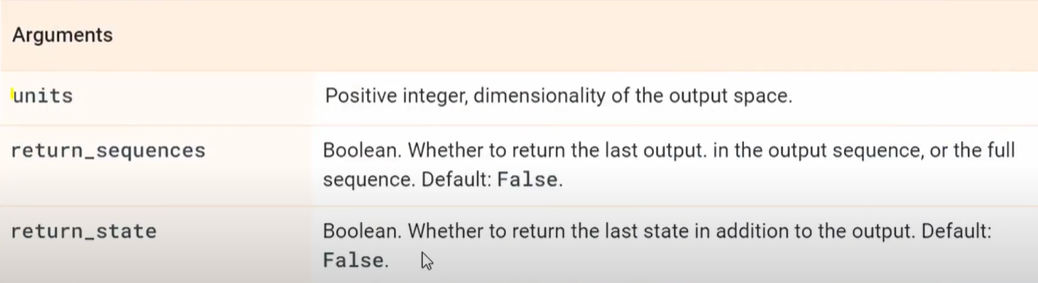

In [ ]:
Embedding_layer_dimension = 20 
LSTM_layer_dimension = 15

input_layer = Input (shape=(padded_seq_len, ))   
output = Embedding(Vocab_size + 1, Embedding_layer_dimension)(input_layer)    #  Vocab_size + 1 because the indexing of the words in vocabulary (Vocab_size) start from 1 not 0
output = LSTM(LSTM_layer_dimension, return_sequences=True)(output)
output = GlobalMaxPooling1D()(output) # Global max pooling operation for 1D temporal data. Downsamples the input representation by taking the maximum value over the time dimension.
output = Dense(32, activation='relu')(output)
output = Dense(1, activation='sigmoid')(output) # Dense layer with class 1 because the sentiment valence is either positive or negative
# And because of binary classification 'sigmoid' activation is more suitable.


In [ ]:
# feed input and output to the model for model intiation.
model = Model(input_layer,output) 

In [ ]:
# compiling the model
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# 'binary_crossentropy' loss because of binary classification (pos and neg)

In [ ]:
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1286)]            0         
                                                                 
 embedding (Embedding)       (None, 1286, 20)          601160    
                                                                 
 lstm (LSTM)                 (None, 1286, 15)          2160      
                                                                 
 global_max_pooling1d (Globa  (None, 15)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 32)                512       
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                             

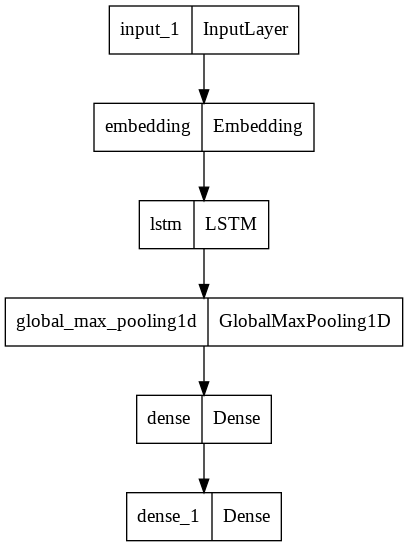

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model)

batch_size = Number of samples per gradient update.

Note: default batch_size is 32. 

Do not use batch_size in the fit method of 'Model, if using Tensorflow dataset.


 Reference for parameters:
 https://keras.io/api/models/model_training_apis/

In [ ]:
# training the model
r = model.fit(pad_train, y_train, 
              validation_data=(pad_test, y_test),
              epochs=2,
              shuffle=True,
              verbose=1)

Epoch 1/2
375/375 [==============================] - 200s 527ms/step - loss: 0.6407 - accuracy: 0.6281 - val_loss: 0.5611 - val_accuracy: 0.7300
Epoch 2/2
375/375 [==============================] - 182s 486ms/step - loss: 0.5394 - accuracy: 0.7385 - val_loss: 0.5513 - val_accuracy: 0.7340


 if the model overfitted, you would see the opposite trend (training loss < validation loss).


If The validation accuracy is greater than training accuracy. This means that the model has generalized fine. It can be considered in two ways:
- training data had several arduous cases to learn
- validation data containing easier cases to predict

In [ ]:
model.evaluate(pad_test, y_test) # pad_text is the padded x_test (consisting of lyrics) and y_test is the valence label 

94/94 [==============================] - 8s 87ms/step - loss: 0.5513 - accuracy: 0.7340


[0.5513045191764832, 0.734000027179718]

# LSTM Model Evaluation 


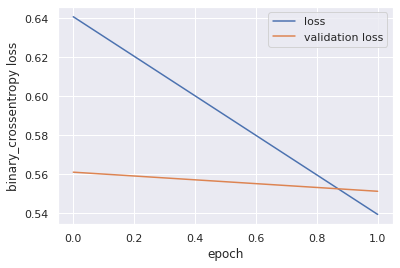

In [ ]:
# Evaluating the model
# plotting the loss and validation loss of the model
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label = 'validation loss')
plt.xlabel("epoch")
plt.ylabel("binary_crossentropy loss")
plt.legend()

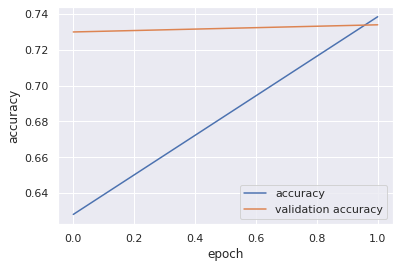

In [ ]:
# plotting the accuracy and validation accuracy of the model
plt.plot(r.history['accuracy'], label= 'accuracy')
plt.plot(r.history['val_accuracy'], label='validation accuracy')
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()

In [ ]:
# extract the predicted probabilities
p_pred = model.predict(pad_test)
p_pred = p_pred.flatten()
print(p_pred.round(2))

[0.82 0.18 0.87 ... 0.1  0.55 0.8 ]


In [ ]:
y_pred = np.where(p_pred > 0.5, 1, 0)
print(y_pred)

[1 0 1 ... 0 1 1]


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred)) # confusion matrix on testing data

[[1146  370]
 [ 428 1056]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.76      0.74      1516
           1       0.74      0.71      0.73      1484

    accuracy                           0.73      3000
   macro avg       0.73      0.73      0.73      3000
weighted avg       0.73      0.73      0.73      3000



you can use confusion matric to calculate precision, recall, accuaracy, score, sensitivity and specificity.

Use the confusion matrix to calculate:

TP (True Postive)
TN (True Negative)
FN (False Negative)
FP (False Positve)
Use that information to calculate precision and recall. Then use precision and recall to calculate F1-score.

Precision, recall and F1-score can also be calculated using sklearn library.

In [ ]:
True_Negative = 1146
False_Positive = 370
False_Negative = 428
True_Positive = 1056

In [ ]:
recall = True_Positive/(True_Positive + False_Negative)
recall
Recall = "{:.2f}".format(recall)
print(Recall)

0.71


In [ ]:
precision = True_Positive/(True_Positive + False_Positive)
precision
Precision = "{:.2f}".format(precision)

print(Precision)

0.74


In [ ]:
F1_score = (precision * recall / (precision + recall)) * 2
F1_score
f1_score = "{:.2f}".format(F1_score)

print(f1_score)

0.73


In [ ]:
#accuracy = (True_Positive + True_Negative) /(3000) # number of (lyrics documents) rows in testing dataset: 3000 in 80: 20 split
accuracy = (True_Positive + True_Negative) /(True_Positive + True_Negative + False_Negative + False_Positive)
accuracy

Accuracy = "{:.2f}".format(accuracy)

print(Accuracy)

0.73


In [ ]:
# Sensitivity is a measure of the proportion of actual positive cases that got predicted as positive (or true positive). 
# Sensitivity is also termed as Recall. 

sensitivity =  (True_Positive)/(True_Positive + False_Negative)
sensitivity
Sensitivity = "{:.2f}".format(sensitivity)

print(Sensitivity)

0.71


In [ ]:
specificity = (True_Negative)/(True_Negative + False_Positive)
specificity 
Specificity = "{:.2f}".format(specificity)

print(Specificity)

0.76


Text(30.5, 0.5, 'Prediction')

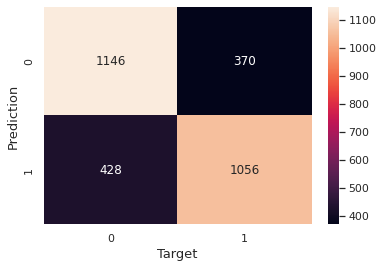

In [ ]:
import seaborn as sns
q = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g') 
# fmt='g' to show numbers in decimal notation instead of E-notation.
# annot=True to show 0 and 1 in the heatmap.

q.set_xlabel("Target", fontsize = 13)
q.set_ylabel("Prediction", fontsize = 13)

Text(30.5, 0.5, 'Prediction')

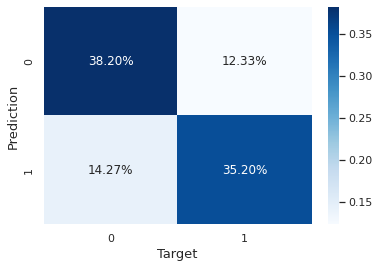

In [ ]:
# To see what percentage of my data is represented in each quadrant
p = sns.heatmap(confusion_matrix(y_test, y_pred)/np.sum(confusion_matrix(y_test, y_pred)), annot=True, 
            fmt='.2%', cmap='Blues')

p.set_xlabel("Target", fontsize = 13)
p.set_ylabel("Prediction", fontsize = 13)

In [ ]:
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[1146  370]
 [ 428 1056]]


Text(30.5, 0.5, 'Prediction')

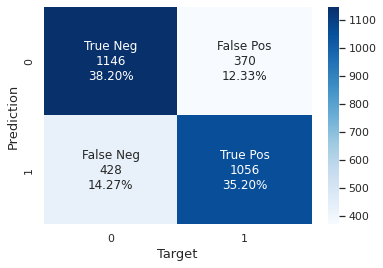

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
c = sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')
c.set_xlabel("Target", fontsize = 13)
c.set_ylabel("Prediction", fontsize = 13)


# Predicting the sentiment of any unknown text

In [ ]:
def predict_sentiment(text):
  # preprocessing the given text 
  text_seq = tokenizer.texts_to_sequences(text)
  text_pad = pad_sequences(text_seq, maxlen=padded_seq_len) # Pad the sequence so that it same size as train sequence length (Vocab_size)

  # predicting the class
  predicted_sentiment = model.predict(text_pad).round()

  if predicted_sentiment == 1.0:
    return(print('Positive sentiment'))
  else:
    return(print('Negative sentiment'))

In [ ]:
# I Hate U, I Love U Song by Gnash --> arouses sad feelings and model predicted it right

text = ["feeling used but I am still missing you And I can't see the end of this Just wanna feel your kiss Against my lips And now all this time is passing by But I still can't seem to tell you why It hurts me every time I see you Realize how much I need you I hate you, I love you I hate that I love you Don't want to but I can't put Nobody else above you I hate you, I love you I hate that I want you You want her, you need her And I'll never be her"]
predict_sentiment(text)

Negative sentiment


In [ ]:
# Heaven by Beyonce -> sad song 

text = ["I fought for you The hardest, it made me the strongest So tell me your secrets I just can't stand to see you leaving But Heaven couldn't wait for you No, Heaven couldn't wait for you Heaven couldn't wait for you No, Heaven couldn't wait for you So go on, go home We laughed at the darkness So scared that we lost it We stood on the ceilings You showed me love was all you needed"]
predict_sentiment(text)

Negative sentiment


In [ ]:
# Party in the USA by Miley Cyrus -> Happy song
text = ["I hopped off the plane at LAX with a dream and my cardigan Welcome to the land of fame, excess, whoa am I gotta fit in? Jumped in the cab, here I am for the first time Look to my right, and I see the Hollywood sign This is all so crazy, everybody seems so famous My tummy's turnin' and I'm feelin' kinda homesick Too much pressure and I'm nervous That's when the taxi man turned on the radio And the Jay-Z song was on And the Jay-Z song was on And the Jay-Z song was on So I put my hands up, they're playin' my song The butterflies fly away I'm noddin' my head like Yeah! Movin' my hips like Yeah! Got my hands up, they're playin' my song And now I'm gonna be okay Yeah! It's a party in the USA! Yeah! It's a party in the USA!"]
predict_sentiment(text)

Positive sentiment


In [ ]:
# Ariana Grande 7 rings -> arouses positive feelings predicted correctly 
text = ["Yeah, breakfast at Tiffany's and bottles of bubbles Girls with tattoos who like getting in trouble Lashes and diamonds, ATM machines Buy myself all of my favorite things (yeah) Been through some bad shit, I should be a sad bitch Who woulda thought it'd turn me to a savage? Rather be tied up with calls and not strings Write my own checks like I write what I sing, yeah (yeah) My wrist, stop watchin', my neck is flossy Make big deposits, my gloss is poppin' You like my hair? Gee, thanks, just bought it I see it, I like it, I want it, I got it (yeah) I want it, I got it, I want it, I got it I want it, I got it, I want it, I got it You like my hair? Gee, thanks, just bought it I see it, I like it, I want it, I got it (yeah) Wearing a ring, but ain't gon' be no Mrs. Bought matching diamonds for six of my bitches I'd rather spoil all my friends with my riches Think retail therapy my new addiction Whoever said money can't solve your problems Must not have had enough money to solve 'em They say, Which one? I say, Nah, I want all of 'em Happiness is the same price as red bottoms My smile is beamin', my skin is gleamin' The way it shine, I know you've seen it (you've seen it) I bought a crib just for the closet Both his and hers, I want it, I got it, yeah I want it, I got it, I want it, I got it I want it, I got it, I want it, I got it (baby) You like my hair? Gee, thanks, just bought it (oh yeah) I see it, I like it, I want it, I got it (yeah Yeah, my receipts, be lookin' like phone numbers If it ain't money, then wrong number Black card is my business card The way it be settin' the tone for me I don't mean to brag, but I be like, Put it in the bag,  yeah When you see them racks, they stacked up like my ass, yeah Shoot, go from the store to the booth Make it all back in one loop, give me the loot Never mind, I got the juice Nothing but net when we shoot Look at my neck, look at my jet Ain't got enough money to pay me respect Ain't no budget when I'm on the set If I like it, then that's what I get, yeah I want it, I got it, I want it, I got it (yeah) I want it, I got it, I want it, I got it (oh yeah, yeah) You like my hair? Gee, thanks, just bought it I see it, I like it, I want it, I got it (yeah)"] 
predict_sentiment(text)

Positive sentiment


In [ ]:
# Ariana Grande Thank you next next 
text = ["Thought I'd end up with Sean But he wasn't a match Wrote some songs about Ricky Now I listen and laugh Even almost got married And for Pete, I'm so thankful Wish I could say thank you to Malcolm 'Cause he was an angel One taught me love One taught me patience And one taught me pain Now, I'm so amazing Say I've loved and I've lost But that's not what I see So, look what I got Look at what you taught me And for that, I say Thank you, next (next) Thank you, next (next) Thank you, next I'm so grateful for my ex Thank you, next (next) Thank you, next (next) Thank you, next (next) I'm so Spend more time with my friends I ain't worried 'bout nothin' Plus, I met someone else We're havin' better discussions I know they say I move on too fast But this one gon' last 'Cause her name is Ari And I'm so good with that (so good with that) She taught me love (love) She taught me patience (patience) She handles pain (pain) That amazing (yeah, she's amazing) I've loved and I've lost (yeah, yeah) But that's not what I see (yeah, yeah) 'Cause look what I've found (yeah, yeah) Ain't no need for searching And for that, I say Thank you, next (thank you, next) Thank you, next (thank you, next) Thank you, next (thank you) I'm so grateful for my ex Thank you, next (thank you, next) Thank you, next (said thank you, next) Thank you, next (next) I'm so grateful for my ex Thank you, next Thank you, next Thank you, next I'm so One day I'll walk down the aisle Holding hands with my mama I'll be thanking my dad 'Cause she grew from the drama Only wanna do it once, real bad Gon' make that last God forbid something happens Least this song is a smash (song is a smash) I've got so much love (love) Got so much patience (patience) I've learned from the pain (pain) I turned out amazing (turned out amazing) I've loved and I've lost (yeah, yeah) But that's not what I see (yeah, yeah) 'Cause look what I've found (yeah, yeah) Ain't no need for searching And for that, I'll say Thank you, next (thank you, next) Thank you, next (thank you, next) Thank you, next I'm so grateful for my ex Thank you, next (thank you, next) Thank you, next (said thank you, next) Thank you, next (next) I'm so grateful for my ex Thank you, next Thank you, next Thank you, next Yeah, yee Thank you, next Thank you, next Thank you, next Yeah, yee"]
predict_sentiment(text)

Positive sentiment


In [ ]:
# Love Me Song by Justin Bieber --> happy song predicted correctly

text = ["""This JB My friends say I'm a fool to think That you're the one for me I guess I'm just a sucker for love Cause honestly the truth is that You know I'm never leaving Cause you're my angel sent from above Baby you can do no wrong My money is yours Give you little more because I love you, love you With me, girl, is where you belong Just stay right here I promise my dear I'll put nothing above you. above you Love me, Love me Say that you love me Fool me, fool me Oh how you do me Kiss me, kiss me Say that you miss me Tell me what I wanna hear Tell me you (love me) Love me, love me Say that you love me Fool me, fool me
Oh how you do me
Kiss me, kiss me
Say that you miss me
Tell me what I wanna hear
Tell me you love me
People try to tell me
But I still refuse to listen
Cause they don't get to spend time with you
A minute with you is worth more than
A thousand days without your love, oh your love
Baby you can do no wrong
My money is yours
Give you little more because I love you, love you
With me, girl, is where you belong
Just stay right here
I promise my dear I'll put nothing above you. above you
Love me, love me
Say that you love me
Fool me, fool me
Oh how you do me
Kiss me, kiss me
Say that you miss me
Tell me what I wanna hear
Tell me you love me.
Love me, love me
Say that you love me
Fool me, fool me
Oh how you do me
Kiss me, kiss me
Say that you miss me
Tell me what I wanna hear
Tell me you love me.
My heart is blind but I don't care
Cause when I'm with you everything has disappeared
And every time I hold you near
I never wanna let you go, oh
Love me, Love me
Say that you love me
Fool me, fool me
Oh how you do me
Kiss me, kiss me
Say that you miss me
Tell me what I wanna hear
Tell me you love me.
Love me, love me
Say that you love me
Fool me, fool me
Oh how you do me
Kiss me, kiss me
Say that you miss me
Tell me what I wanna hear
Tell me you love me"""]

predict_sentiment(text)

Positive sentiment


In [ ]:
# lose you to love me lyrics by Selena Gomez --> sad song predicted correctly

text = ["""You promised the world and I fell for it
I put you first and you adored it
Set fires to my forest
And you let it burn
Sang off-key in my chorus
'Cause it wasn't yours
I saw the signs and I ignored it
Rose-colored glasses all distorted
Set fire to my purpose
And I let it burn
You got off on the hurtin'
When it wasn't yours, yeah
We'd always go into it blindly
I needed to lose you to find me
This dancing was killing me softly
I needed to hate you to love me, yeah
To love, love, yeah
To love, love, yeah
To love, yeah
I needed to lose you to love me, yeah
To love, love, yeah
To love, love, yeah
To love, yeah
I needed to lose you to love me
I gave my all and they all know it
You turned me down and now it's showing
In two months, you replaced us
Like it was easy
Made me think I deserved it
In the thick of healing, yeah
We'd always go into it blindly
I needed to lose you to find me
This dancing was killing me softly
I needed to hate you to love me, yeah
To love, love, yeah
To love, love, yeah
To love, yeah
I needed to lose you to love me, yeah
To love, love, yeah
To love, love, yeah
To love, yeah
I needed to lose you to love me
You promised the world and I fell for it
I put you first and you adored it
Set fires to my forest
And you let it burn
Sang off-key in my chorus
To love, love, yeah
To love, love, yeah
To love, yeah
I needed to hate you to love me, yeah
To love, love, yeah
To love, love, yeah
To love, yeah
I needed to lose you to love me
To love, love, yeah
To love, love, yeah
To love, yeah
And now the chapter is closed and done
To love, love, yeah
To love, love, yeah
To love, yeah
And now it's goodbye, it's goodbye for us
"""]

predict_sentiment(text)

Negative sentiment


In [ ]:
# Party in the USA by Miley Cyrus --> happy song predicted correctly
text = ["""I hopped off the plane at L.AX
With a dream and my cardigan
Welcome to the land of fame excess (woah)
Am I gonna fit in?
Jumped in the cab, here I am for the first time
Look to my right, and I see the Hollywood sign
This is all so crazy
Everybody seems so famous
My tummy's turnin' and I'm feelin' kinda homesick
Too much pressure and I'm nervous
That's when the taxi man turned on the radio
And a Jay-Z song was on
And a Jay-Z song was on
And a Jay-Z song was on
So I put my hands up
They're playin' my song, the butterflies fly away
I'm noddin' my head like, yeah
Movin' my hips like, yeah
I got my hands up, they're playin' my song
They know I'm gonna be okay
Yeah, it's a party in the U.S.A.
Yeah, it's a party in the U.S.A.
Get to the club in my taxi cab
Everybody's looking at me now
Like, "Who's that chick, that's rockin' kicks?
She gotta be from out of town"
So hard with my girls not around me
It's definitely not a Nashville party
'Cause all I see are stilettos
I guess I never got the memo
My tummy's turnin' and I'm feelin' kinda homesick
Too much pressure and I'm nervous
That's when the DJ dropped my favorite tune
And a Britney song was on
And a Britney song was on
And a Britney song was on
So I put my hands up
They're playin' my song, the butterflies fly away
I'm noddin' my head like, yeah
Movin' my hips like, yeah
I got my hands up, they're playin' my song
They know I'm gonna be okay
Yeah, it's a party in the U.S.A.
Yeah, it's a party in the U.S.A.
Feel like hoppin' on a flight (on a flight)
Back to my hometown tonight (town tonight)
Something stops me every time (every time)
The DJ plays my song and I feel alright
So I put my hands up
They're playin' my song, the butterflies fly away
I'm noddin' my head like, yeah (noddin' my head)
Movin' my hips like, yeah (ooh yeah)
I got my hands up, they're playin' my song
They know I'm gonna be okay (gonna be okay)
Yeah, it's a party in the U.S.A.
Yeah, it's a party in the U.S.A.
So I put my hands up
They're playin' my song, the butterflies fly away (flying away)
I'm noddin' my head like, yeah (noddin' my head like, yeah)
Movin' my hips like, yeah (movin' my hips like, yeah)
I got my hands up, they're playin' my song
They know I'm gonna be okay (I'm gonna be okay)
Yeah, it's a party in the U.S.A.
Yeah (ha-ha-ha-ha), it's a party in the U.S.A."""]

predict_sentiment(text)

Positive sentiment


In [ ]:
# Levitating by Dua Lipa -> happy song predicted correctly to be positive
text = ["""If you wanna run away with me, I know a galaxy
And I can take you for a ride
I had a premonition that we fell into a rhythm
Where the music don't stop for life
Glitter in the sky, glitter in my eyes
Shining just the way I like
If you're feeling like you need a little bit of company
You met me at the perfect time
You want me, I want you, baby
My sugarboo, I'm levitating
The Milky Way, we're renegading
Yeah, yeah, yeah, yeah, yeah
I got you, moonlight, you're my starlight
I need you all night, come on, dance with me
I'm levitating
You, moonlight, you're my starlight (you're the moonlight)
I need you all night, come on, dance with me
I'm levitating
I believe that you're for me, I feel it in our energy
I see us written in the stars
We can go wherever, so let's do it now or never, baby
Nothing's ever, ever too far
Glitter in the sky, glitter in our eyes
Shining just the way we are
I feel like we're forever, every time we get together
But whatever, let's get lost on Mars
You want me, I want you, baby
My sugarboo, I'm levitating
The Milky Way, we're renegading
Yeah, yeah, yeah, yeah, yeah
I got you, moonlight, you're my starlight
I need you all night, come on, dance with me
I'm levitating
You, moonlight, you're my starlight (you're the moonlight)
I need you all night, come on, dance with me
I'm levitating (woo)
You can fly away with me tonight
You can fly away with me tonight
Baby, let me take you for a ride
Yeah, yeah, yeah, yeah, yeah
I'm levitating (woo)
You can fly away with me tonight
You can fly away with me tonight
Baby, let me take you for a ride
Yeah, yeah, yeah, yeah, yeah (woo)
My love is like a rocket, watch it blast off
And I'm feeling so electric, dance my arse off
And even if I wanted to, I can't stop
Yeah, yeah, yeah, yeah, yeah
My love is like a rocket, watch it blast off
And I'm feeling so electric, dance my arse off
And even if I wanted to, I can't stop
Yeah, yeah, yeah, yeah, yeah
You want me, I want you, baby
My sugarboo, I'm levitating
The Milky Way, we're renegading
I got you (yeah), moonlight, you're my starlight
I need you all night (all night), come on, dance with me
I'm levitating (woo)
You can fly away with me tonight (tonight)
You can fly away with me tonight
Baby, let me take you for a ride
Yeah, yeah, yeah, yeah, yeah (take you for a ride)
I'm levitating (woo)
You can fly away with me tonight (tonight)
You can fly away with me tonight
Baby, let me take you for a ride
Yeah, yeah, yeah, yeah, yeah (let me take you for a ride)
I got you, moonlight, you're my starlight (you are my starlight)
I need you all night, come on, dance with me (come on, dance with me, baby)
I'm levitating
You, moonlight, you're my starlight (you're the moonlight)
I need you all night, come on, dance with me
I'm levitating"""]
predict_sentiment(text)

Positive sentiment


In [ ]:
# Dark Paradise by Lana Del ray -> sad song predicted correctly as Negative 

text = ["""All my friends tell me I should move on
I'm lying in the ocean, singing your song
Ahh
That's how you sang it
Loving you forever can't be wrong
Even though you're not here, won't move on
Ahh
That's how we played it
And there's no remedy for memory, your face is like a melody
It won't leave my head
Your soul is haunting me and telling me that everything is fine
But I wish I was dead
Every time I close my eyes, it's like a dark paradise
No one compares to you
I'm scared that you won't be waiting on the other side
Every time I close my eyes, it's like a dark paradise
No one compares to you
I'm scared that you won't be waiting on the other side
All my friends ask me why I stay strong
Tell 'em when you find true love, it lives on
Ahh
That's why I stay here
And there's no remedy for memory, your face is like a melody
It won't leave my head
Your soul is haunting me and telling me that everything is fine
But I wish I was dead
Every time I close my eyes, it's like a dark paradise
No one compares to you
I'm scared that you won't be waiting on the other side
Every time I close my eyes, it's like a dark paradise
No one compares to you
But there's no you, except in my dreams tonight

I don't want to wake up from this tonight
Oh-oh-oh-oh-hah-hah-hah-hah
I don't want to wake up from this tonight
There's no relief, I see you in my sleep
And everybody's rushing me, but I can feel you touching me
There's no release, I feel you in my dreams
Telling me I'm fine
"""]
predict_sentiment(text)



Negative sentiment


In [ ]:
# saving the model for future purpose
# model.save('/content/drive/My Drive/Colab Notebooks/data/models_saved/LSTM_valence.h5')   # creates HDF5 file for model

# Save model

Reference: https://keras.io/api/models/

In [ ]:
from keras.models import model_from_json
# serialize model to json
json_model = model.to_json()
#save the model architecture to JSON file
with open('/content/drive/My Drive/Colab Notebooks/data/models_saved/lyrics_LSTM_model_73.json', 'w') as json_file:
    json_file.write(json_model)

#saving the weights of the model
model.save_weights('/content/drive/My Drive/Colab Notebooks/data/models_saved/lyrics_LSTM_weights_73.h5')
#Model loss and accuracy
loss,acc = model.evaluate(pad_test, y_test, verbose=2)

94/94 - 12s - loss: 0.5513 - accuracy: 0.7340 - 12s/epoch - 124ms/step


# Load model

In [ ]:
from keras.initializers import glorot_uniform
#Reading the model from JSON file
with open('/content/drive/My Drive/Colab Notebooks/data/models_saved/lyrics_LSTM_model_73.json', 'r') as json_file:
    json_savedModel= json_file.read()

    
#load the model architecture 
model_j = tf.keras.models.model_from_json(json_savedModel) 
model_j.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1286)]            0         
                                                                 
 embedding (Embedding)       (None, 1286, 20)          601160    
                                                                 
 lstm (LSTM)                 (None, 1286, 15)          2160      
                                                                 
 global_max_pooling1d (Globa  (None, 15)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 32)                512       
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                             

In [ ]:
model_j.load_weights('/content/drive/My Drive/Colab Notebooks/data/models_saved/lyrics_LSTM_weights_73.h5')

In [ ]:
#Compiling the model
model_j.compile(loss='binary_crossentropy',
         optimizer='adam',
         metrics=['accuracy'])

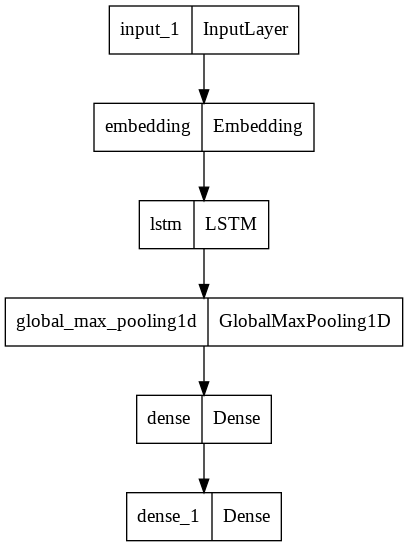

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_j)

In [ ]:
# Predicting the sentiment of any lyrics text

def predict_sentiment1(text):
  # preprocessing the given text 
  padded_seq_len = 1286  # derived above
  #padded_seq_len = 1722 # change to 1722 if you get 1722 above.
  text_seq = tokenizer.texts_to_sequences(text)
  text_pad = pad_sequences(text_seq, maxlen=padded_seq_len) # Pad the sequence so that it same size as train sequence length (Vocab_size)

  # predicting the class
  predicted_sentiment = model_j.predict(text_pad).round()

  if predicted_sentiment == 1.0:
    return(print('Positive sentiment'))
  else:
    return(print('Negative sentiment'))

In [ ]:
# Party in the USA by Miley Cyrus -> Happy song
text = ["I hopped off the plane at LAX with a dream and my cardigan Welcome to the land of fame, excess, whoa am I gotta fit in? Jumped in the cab, here I am for the first time Look to my right, and I see the Hollywood sign This is all so crazy, everybody seems so famous My tummy's turnin' and I'm feelin' kinda homesick Too much pressure and I'm nervous That's when the taxi man turned on the radio And the Jay-Z song was on And the Jay-Z song was on And the Jay-Z song was on So I put my hands up, they're playin' my song The butterflies fly away I'm noddin' my head like Yeah! Movin' my hips like Yeah! Got my hands up, they're playin' my song And now I'm gonna be okay Yeah! It's a party in the USA! Yeah! It's a party in the USA!"]
predict_sentiment(text)

Positive sentiment


In [ ]:
# I Hate U, I Love U Song by Gnash --> arouses sad feelings and model predicted it right

text = ["feeling used but I am still missing you And I can't see the end of this Just wanna feel your kiss Against my lips And now all this time is passing by But I still can't seem to tell you why It hurts me every time I see you Realize how much I need you I hate you, I love you I hate that I love you Don't want to but I can't put Nobody else above you I hate you, I love you I hate that I want you You want her, you need her And I'll never be her"]
predict_sentiment(text)

Negative sentiment


In [ ]:
# Heaven by Beyonce -> sad song 

text = ["I fought for you The hardest, it made me the strongest So tell me your secrets I just can't stand to see you leaving But Heaven couldn't wait for you No, Heaven couldn't wait for you Heaven couldn't wait for you No, Heaven couldn't wait for you So go on, go home We laughed at the darkness So scared that we lost it We stood on the ceilings You showed me love was all you needed"]
predict_sentiment(text)

Negative sentiment


In [ ]:
# Ariana Grande 7 rings -> arouses positive feelings predicted correctly 
text = ["Yeah, breakfast at Tiffany's and bottles of bubbles Girls with tattoos who like getting in trouble Lashes and diamonds, ATM machines Buy myself all of my favorite things (yeah) Been through some bad shit, I should be a sad bitch Who woulda thought it'd turn me to a savage? Rather be tied up with calls and not strings Write my own checks like I write what I sing, yeah (yeah) My wrist, stop watchin', my neck is flossy Make big deposits, my gloss is poppin' You like my hair? Gee, thanks, just bought it I see it, I like it, I want it, I got it (yeah) I want it, I got it, I want it, I got it I want it, I got it, I want it, I got it You like my hair? Gee, thanks, just bought it I see it, I like it, I want it, I got it (yeah) Wearing a ring, but ain't gon' be no Mrs. Bought matching diamonds for six of my bitches I'd rather spoil all my friends with my riches Think retail therapy my new addiction Whoever said money can't solve your problems Must not have had enough money to solve 'em They say, Which one? I say, Nah, I want all of 'em Happiness is the same price as red bottoms My smile is beamin', my skin is gleamin' The way it shine, I know you've seen it (you've seen it) I bought a crib just for the closet Both his and hers, I want it, I got it, yeah I want it, I got it, I want it, I got it I want it, I got it, I want it, I got it (baby) You like my hair? Gee, thanks, just bought it (oh yeah) I see it, I like it, I want it, I got it (yeah Yeah, my receipts, be lookin' like phone numbers If it ain't money, then wrong number Black card is my business card The way it be settin' the tone for me I don't mean to brag, but I be like, Put it in the bag,  yeah When you see them racks, they stacked up like my ass, yeah Shoot, go from the store to the booth Make it all back in one loop, give me the loot Never mind, I got the juice Nothing but net when we shoot Look at my neck, look at my jet Ain't got enough money to pay me respect Ain't no budget when I'm on the set If I like it, then that's what I get, yeah I want it, I got it, I want it, I got it (yeah) I want it, I got it, I want it, I got it (oh yeah, yeah) You like my hair? Gee, thanks, just bought it I see it, I like it, I want it, I got it (yeah)"] 
predict_sentiment(text)

Positive sentiment


# References
[1.] https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

[2.] https://stackoverflow.com/questions/69875073/confusion-matrix-valueerror-classification-metrics-cant-handle-a-mix-of-binary

[3.]  https://stackoverflow.com/questions/29647749/seaborn-showing-scientific-notation-in-heatmap-for-3-digit-numbers

[4.] https://activewizards.com/blog/sentiment-analysis-with-naive-bayes-and-lstm/

[5.] https://www.youtube.com/watch?v=e0WW5w13V64

[6.] https://www.youtube.com/watch?v=XsceLCzARqQ

[7.] https://www.youtube.com/watch?v=P0o5U9pq8_s

[8.] https://machinelearningmastery.com/diagnose-overfitting-underfitting-lstm-models/

[9.] https://www.kaggle.com/code/ryanholbrook/overfitting-and-underfitting/tutorial

[10.] https://pyimagesearch.com/2019/10/14/why-is-my-validation-loss-lower-than-my-training-loss/

[11.] https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/

[12.] https://keras.io/api/layers/pooling_layers/global_max_pooling1d/